# DataFrame et Matrice

Les [DataFrame](http://en.wikipedia.org/wiki/Data_frame) se sont imposés pour manipuler les données. Avec cette façon de représenter les données, associée à des un ensemble de méthodes couramment utilisées, ce qu'on faisait en une ou deux boucles se fait maintenant en une seule fonction. Cette séance contient beaucoup d'exemples et peu d'exercices. Il est conseillé de supprimer toutes les sorties et de les exécuter une à une.

In [ ]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

L'introduction ne contient pas d'éléments nécessaires à la réalisation du TD.

## Trouver chaussure à ses stats

La programmation est omni-présente lorsqu'on manipule des données. On leur applique des traitements parfois standards, souvent adaptés pour la circonstance. On souhaite toujours programmer le moins possible mais aussi ne pas avoir à réapprendre un langage à chaque fois qu'on doit manipuler les données.

Le logiciel [MATLAB](http://www.mathworks.fr/products/matlab/) a proposé voici 30 ans un premier environnement de travail facilitant le calcul matriciel et ce standard s'est imposé depuis. Comme *MATLAB* est un logiciel payant, des équivalents open source et gratuits ont été développés. Ils proposent tous le calcul matriciel, la possibilité de visualiser, un environnement de développement. Ils différent pas des performances différentes et des éventails d'extensions différentes. 

* [R](http://www.r-project.org/) : la référence pour les statisticiens, il est utilisé par tous les chercheurs dans ce domaine.
* [SciLab](http://www.scilab.org/fr) : développé par l'[INRIA](http://www.inria.fr/).
* [Octave](http://www.gnu.org/software/octave/) : clone open source de *MATLAB*, il n'inclut pas autant de librairies mais il est gratuit.
* [Julia](http://julialang.org/) : c'est le plus jeune, il est plus rapide mais ses librairies sont moins nombreuses.

Ils sont tous performants en qui concerne le calcul numérique, ils le sont beaucoup moins lorsqu'il s'agit de faire des traitements qui ne sont pas numériques (traiter du texte par exemple) car ils n'ont pas été prévus pour cela à la base (à l'exception de Julia peut être qui est plus jeune [Python v. Clojure v. Julia](http://matthewrocklin.com/blog/work/2014/01/13/Text-Benchmarks)). Le langage Python est devenu depuis 2012 une alternative intéressante pour ces raisons (voir également [Why Python?](http://www.xavierdupre.fr/blog/2014-07-11_nojs.html)) :

* Il propose les même fonctionnalités de base (calcul matriciel, graphiques, environnement).
* Python est plus pratique pour tout ce qui n'est pas numérique (fichiers, web, server web, SQL, ...).
* La plupart des librairies connues et écrites en C++ ont été portée sous Python.
* Il est plus facile de changer un composant important en Python (numpy par exemple) si le nouveau est plus efficace.

Un inconvénient peut-être est qu'il faut installer plusieurs extensions avant de pouvoir commencer à travailler (voir [Installation de Python](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/data2a.html#usage-regulier)) :

* [numpy](http://www.numpy.org/) : calcul matriciel
* [pandas](http://pandas.pydata.org/) : DataFrame
* [jupyter](http://jupyter.org/) : notebooks (comme celui-ci)
* [matplotlib](http://matplotlib.org/) : graphiques
* [scikit-learn](http://scikit-learn.org/stable/) : machine learning, statistique descriptive
* [statsmodels](http://statsmodels.sourceforge.net/) : statistiques descriptives

Optionnels :

* [ggplot](http://ggplot.yhathq.com/) : extension très populaire sur *R* et portée sur Python
* [Spyder](https://code.google.com/p/spyderlib/) : environnement type R, MATLAB, ...
* [scipy](http://www.scipy.org/) : autres traitements numériques (voir [NumPy vs. SciPy vs. other packages](http://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy))
* [cvxopt](http://cvxopt.org/) : optimisation quadratique sous contrainte
* [Pillow](https://pypi.python.org/pypi/Pillow) : traitement d'image
* [PyQt4](https://wiki.python.org/moin/PyQt4) : interface graphique
* [openpyxl](http://pythonhosted.org/openpyxl/) : lecture/écriture de fichir Excel
* [dask](http://dask.pydata.org/en/latest/) : dataframe distribué et capables de gérer des gros volumes de données (> 5Go)


Les environnements Python évoluent très vite, les modules mentionnés ici sont tous maintenus mais il eut en surgir de nouveau très rapidement. Quelques environnements à suivre :

* [PyTools](http://pytools.codeplex.com/) : environnement de développement pour Visual Studio
* [PyCharm](http://www.jetbrains.com/pycharm/) : n'inclut pas les graphiques mais est assez agréable pour programmer
* [IEP](http://www.iep-project.org/index.html) : écrit en Python
* [PyDev](http://pydev.org/) : extension pour [Eclipse](http://www.eclipse.org/)
* [WingIDE](https://wingware.com/)

Si vous ne voulez pas programmer, il existe des alternatives. C'est assez performant sur de petits jeux de données mais cela devient plus complexe dès qu'on veut programmer car le code doit tenir compte des spécificités de l'outil. 

* [Orange](http://orange.biolab.si/) : écrit en Python
* [Weka](http://www.cs.waikato.ac.nz/ml/weka/) : écrit en Java (le pionnier)
* [RapidMiner](http://rapidminer.com/) : version gratuite et payante
* [AzureML](https://studio.azureml.net/) : solution Microsoft de workflow  de données


C'est parfois plus pratique pour commencer mais mal commode si on veut automatiser un traitrment pour répéter la même tâche de façon régulière. Pour les travaux pratiques à l'ENSAE, j'ai choisi les [notebook](http://jupyter.org/notebook.html) : c'est une page blanche où on peut mélanger texte, équations, graphiques, code et exécution de code.

**Taille de DataFrame**

Les DataFrame en Python sont assez rapides lorsqu'il y a moins de 10 millions d'observations et que le fichier texte qui décrit les données n'est pas plus gros que 10 Mo. Au delà, il faut soit être patient, soit être astucieux comme ici : [DataFrame et SQL](http://www.xavierdupre.fr/blog/2014-07-19_nojs.html), [Data Wrangling with Pandas](http://nbviewer.ipython.org/urls/gist.github.com/fonnesbeck/5850413/raw/3a9406c73365480bc58d5e75bc80f7962243ba17/2.+Data+Wrangling+with+Pandas.ipynb).

**Valeurs manquantes**

Lorsqu'on récupère des données, il peut arriver qu'une valeur soit manquante. 

* [Missing Data](http://pandas.pydata.org/pandas-docs/dev/10min.html?highlight=working#missing-data)
* [Working with missing data](http://pandas.pydata.org/pandas-docs/dev/missing_data.html)

## DataFrame (pandas)

**Quelques liens :** [An Introduction to Pandas](http://synesthesiam.com/posts/an-introduction-to-pandas.html)

Un [Data Frame](http://en.wikipedia.org/wiki/Data_frame) est un objet qui est présent dans la plupart des logiciels de traitements de données, c'est une **matrice**, chaque colonne est de même type (nombre, dates, texte), elle peut contenir des valeurs manquantes. On peut considérer chaque colonne comme les variables d'une table ([pandas.Dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) - cette page contient toutes les méthodes de la classe).

In [ ]:
import pandas
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "prix":221.0, "devise":"euros" },]
df = pandas.DataFrame(l)
df

,date,devise,prix
0,2014-06-22,euros,220
1,2014-06-23,euros,221


Avec une valeur manquante :

In [ ]:
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "devise":"euros"  },]
df = pandas.DataFrame(l)
df

,date,devise,prix
0,2014-06-22,euros,220
1,2014-06-23,euros,NaN


[NaN](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html#numpy.isnan) est une convention pour une valeur manquante. On extrait la variable ``prix`` :

In [ ]:
df.prix

0    220
1    NaN
Name: prix, dtype: float64

Ou :

In [ ]:
df["prix"]

0    220
1    NaN
Name: prix, dtype: float64

Pour extraire plusieurs colonnes :

In [ ]:
df [["date","prix"]]

,date,prix
0,2014-06-22,220
1,2014-06-23,NaN


Pour prendre la transposée (voir aussi [DataFrame.transpose](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.transpose.html)) :

In [ ]:
df.T

,0,1
date,2014-06-22,2014-06-23
devise,euros,euros
prix,220,NaN


### Lecture et écriture de DataFrame

Aujourd'hui, on n'a plus besoin de réécrire soi-même une fonction de lecture ou d'écriture de données présentées sous forme de tables. Il existe des fonctions plus génériques qui gère un grand nombre de cas.
Cette section présente brièvement les fonctions qui permettent de lire/écrire un DataFrame aux formats texte/Excel. On reprend l'exemple de section précédente. L'instruction ``encoding=utf-8`` n'est pas obligatoire mais conseillée lorsque les données contiennent des accents (voir [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html)).

In [ ]:
import pandas
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "prix":221.0, "devise":"euros" },]
df = pandas.DataFrame(l)

# écriture au format texte
df.to_csv("exemple.txt",sep="\t",encoding="utf-8", index=False)

# on regarde ce qui a été enregistré
with open("exemple.txt", "r", encoding="utf-8") as f : text = f.read()
print(text)

# on enregistre au format Excel
df.to_excel("exemple.xlsx", index=False)

# on ouvre Excel sur ce fichier (sous Windows)
from pyquickhelper.loghelper import run_cmd
from pyquickhelper.loghelper.run_cmd import skip_run_cmd
out,err = run_cmd("exemple.xlsx", wait = False)

date	devise	prix
2014-06-22	euros	220.0
2014-06-23	euros	221.0



On peut récupérer des données directement depuis Internet ou une chaîne de caractères et afficher le début ([head](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)) ou la fin ([tail](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.tail.html)). Le code qui suit est ce qu'on écrirait d'habitude :

In [ ]:
if False:
    import pandas, urllib.request
    furl = urllib.request.urlopen("http://www.xavierdupre.fr/enseignement/complements/marathon.txt")
    df = pandas.read_csv(furl, sep="\t", names=["ville", "annee", "temps","secondes"])
    df.head()

Et pout éviter les erreurs de connexion internet, les données font partie intégrante du module :

In [ ]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589
1,PARIS,2010,02:06:41,7601
2,PARIS,2009,02:05:47,7547
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637


La fonction [describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) permet d'en savoir un peu plus sur les colonnes numériques de cette table.

In [ ]:
df.describe()

,annee,secondes
count,359.000000,359.000000
mean,1989.754875,7933.660167
std,14.028545,385.289830
min,1947.000000,7382.000000
25%,1981.000000,7698.000000
50%,1991.000000,7820.000000
75%,2001.000000,8046.500000
max,2011.000000,10028.000000


### DataFrame et Index

On désigne généralement une colonne ou *variable* par son nom. Les lignes peuvent être désignées par un entier.

In [ ]:
import pandas
l = [ { "date":"2014-06-22", "prix":220.0, "devise":"euros" }, 
      { "date":"2014-06-23", "prix":221.0, "devise":"euros" },]
df = pandas.DataFrame(l)
df

,date,devise,prix
0,2014-06-22,euros,220
1,2014-06-23,euros,221


On extrait une ligne ([ix](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.ix.html)) :

In [ ]:
df.ix[1]

date      2014-06-23
devise         euros
prix             221
Name: 1, dtype: object

Mais il est possible d'utiliser une colonne ou plusieurs colonnes comme index ([set_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)) :

In [ ]:
dfi = df.set_index("date")
dfi

,devise,prix
date,,
2014-06-22,euros,220
2014-06-23,euros,221


On peut maintenant désigner une ligne par une date :

In [ ]:
dfi.ix["2014-06-23"]

devise    euros
prix        221
Name: 2014-06-23, dtype: object

Il est possible d'utiliser plusieurs colonnes comme index :

In [ ]:
df = pandas.DataFrame([ {"prénom":"xavier", "nom":"dupré", "arrondissement":18}, 
       {"prénom":"clémence", "nom":"dupré", "arrondissement":15 } ])
dfi = df.set_index(["nom","prénom"])
dfi.ix["dupré","xavier"]

arrondissement    18
Name: (dupré, xavier), dtype: int64

Si on veut changer l'index ou le supprimer ([reset_index](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)) :

In [ ]:
dfi.reset_index(drop=False, inplace=True)  
        # le mot-clé drop pour garder ou non les colonnes servant d'index
        # inplace signifie qu'on modifie l'instance et non qu'une copie est modifiée
        # donc on peut aussi écrire dfi2 = dfi.reset_index(drop=False)  
dfi.set_index(["nom", "arrondissement"],inplace=True)
dfi

prénom
nom   arrondissement          
dupré 18                xavier
      15              clémence

[2 rows x 1 columns]

Les index sont particulièrement utiles lorsqu'il s'agit de fusionner deux tables. Pour des petites tables, la plupart du temps, il est plus facile de s'en passer.

### Notation avec le symbole ``:``

Le symbole ``:`` désigne une plage de valeurs.

In [ ]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589
1,PARIS,2010,02:06:41,7601
2,PARIS,2009,02:05:47,7547
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637


On peut sélectionner un sous-ensemble de lignes :

In [ ]:
df[3:6]

,ville,annee,temps,secondes
3,PARIS,2008,02:06:40,7600
4,PARIS,2007,02:07:17,7637
5,PARIS,2006,02:08:03,7683


On extrait la même plage mais avec deux colonnes seulement :

In [ ]:
df.ix[3:6,["annee","temps"]]

,annee,temps
3,2008,02:06:40
4,2007,02:07:17
5,2006,02:08:03
6,2005,02:08:02


Le même code pour lequel on renomme les colonnes extraites :

In [ ]:
sub = df.ix[3:6,["annee","temps"]]
sub.columns = ["year","time"]
sub

,year,time
3,2008,02:06:40
4,2007,02:07:17
5,2006,02:08:03
6,2005,02:08:02


## Exercice 1 : créer un fichier Excel
    
On souhaite récupérer les données [donnees_enquete_2003_television.txt](http://www.xavierdupre.fr/enseignement/complements/donnees_enquete_2003_television.txt) (source : [INSEE](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-hdv03&page=fichiers_detail/HDV03/telechargement.htm)).

* ``POIDSLOG`` : Pondération individuelle relative
* ``POIDSF`` : Variable de pondération individuelle
* ``cLT1FREQ`` : Nombre d'heures en moyenne passées à regarder la télévision 
* ``cLT2FREQ`` : Unité de temps utilisée pour compter le nombre d'heures passées à regarder la télévision, cette unité est représentée par les quatre valeurs suivantes
    * 0 : non concerné
    * 1 : jour
    * 2 : semaine
    * 3 : mois 
    
Ensuite, on veut :

1. Supprimer les colonnes vides
2. Obtenir les valeurs distinctes  pour la colonne ``cLT2FREQ``
3. Modifier la matrice pour enlever les lignes pour lesquelles l'unité de temps (cLT2FREQ) n'est pas renseignée ou égale à zéro.
4. Sauver le résultat au format Excel.

Vous aurez peut-être besoin des fonctions suivantes :

* [numpy.isnan](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html)
* [DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [DataFrame.fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) ou 
[DataFrame.isnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)
* [DataFrame.copy](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.copy.html)

In [ ]:
import pandas, io
# ...

## Manipuler un DataFrame : filtrer, union, sort, group by, join, pivot

Si la structure *DataFrame* s'est imposée, c'est parce qu'on effectue toujours les mêmes opérations. Chaque fonction cache une boucle ou deux dont le coût est précisé en fin de ligne :

- **filter** : on sélectionne un sous-ensemble de lignes qui vérifie une condition $\rightarrow O(n)$
- **union** : concaténation de deux jeux de données $\rightarrow O(n_1 + n_2)$
- **sort** : tri  $\rightarrow O(n \ln n)$
- **group by** : grouper des lignes qui partagent une valeur commune  $\rightarrow O(n)$
- **join** : fusionner deux jeux de données en associant les lignes qui partagent une valeur commune  $\rightarrow \in [O(n_1 + n_2), O(n_1 n_2)]$
- **pivot** : utiliser des valeurs présentes dans colonne comme noms de colonnes $\rightarrow O(n)$

Les 5 premières opérations sont issues de la logique de manipulation des données avec le langage [SQL](http://fr.wikipedia.org/wiki/Structured_Query_Language) (ou le logiciel [SAS](http://www.sas.com)). La dernière correspond à un [tableau croisé dynamique](http://fr.wikipedia.org/wiki/Tableau_crois%C3%A9_dynamique). Pour illustrer ces opérations, on prendre le DataFrame suivant :

In [ ]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
print(df.columns)
print("villes",set(df.ville))
print("annee",list(set(df.annee))[:10],"...")

Index(['ville', 'annee', 'temps', 'secondes'], dtype='object')
villes {'FUKUOKA', 'STOCKOLM', 'PARIS', 'CHICAGO', 'AMSTERDAM', 'BOSTON', 'BERLIN', 'LONDON', 'NEW YORK'}
annee [1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956] ...


### filter

Filter consiste à sélectionner un sous-ensemble de lignes du dataframe. Pour filter sur plusieurs conditions, il faut utiliser les opérateurs logique & (et), | (ou), ~ (non) (voir [Mapping Operators to Functions](https://docs.python.org/3.4/library/operator.html#mapping-operators-to-functions)).

* [filter](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html), [mask](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mask.html),[where](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)
* [pandas: filter rows of DataFrame with operator chaining](http://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining)
* [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [ ]:
subset = df [ df.annee == 1971 ]
subset.head()

,ville,annee,temps,secondes
112,FUKUOKA,1971,02:12:51,7971
204,NEW YORK,1971,02:22:54,8574
285,BOSTON,1971,02:18:45,8325


In [ ]:
subset = df [ (df.annee == 1971) & (df.ville == "BOSTON") ]
subset.head()

,ville,annee,temps,secondes
285,BOSTON,1971,02:18:45,8325


### union

union = concaténation de deux DataFrame (qui n'ont pas nécessaire les mêmes colonnes). On peut concaténer les lignes ou les colonnes.

* [concat](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)
* [Merge, join, and concatenate](http://pandas.pydata.org/pandas-docs/stable/merging.html)

In [ ]:
concat_ligne = pandas.concat((df,df))
df.shape,concat_ligne.shape

((360, 4), (720, 4))

In [ ]:
concat_col = pandas.concat((df,df), axis=1)
df.shape,concat_col.shape

((360, 4), (360, 8))

### sort

Sort = trier

* [sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort.html)

In [ ]:
tri = df.sort_values( ["annee", "ville"], ascending=[0,1])
tri.head()

,ville,annee,temps,secondes
35,BERLIN,2011,02:03:38,7418
326,BOSTON,2011,02:03:02,7382
203,LONDON,2011,02:04:40,7480
0,PARIS,2011,02:06:29,7589
277,STOCKOLM,2011,02:14:07,8047


### group by

Cette opération consiste à grouper les lignes qui partagent une caractéristique commune (une ou ou plusieurs valeurs par exemple). Sur chaque groupe, on peut calculer une somme, une moyenne...

* [groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
* [sum](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html), [cumsum](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html), [mean](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html), [count](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
* [SQL GROUP BY](http://sql.sh/cours/group-by)
* [Group By: split-apply-combine](http://pandas.pydata.org/pandas-docs/dev/groupby.html)
* [group by customisé](http://stackoverflow.com/questions/15322632/python-pandas-df-groupby-agg-column-reference-in-agg)


In [ ]:
gr = df.groupby("annee")
gr

In [ ]:
nb = gr.count()
nb.sort_index(ascending=False).head()

,ville,annee,temps,secondes
annee,,,,
2011,5,5,5,5
2010,9,9,9,9
2009,9,9,9,9
2008,9,9,9,9
2007,9,9,9,9


In [ ]:
nb = gr.sum()
nb.sort_index(ascending=False).head(n=2)

,secondes
annee,
2011,37916
2010,68673


In [ ]:
nb = gr.mean()
nb.sort_index(ascending=False).head(n=3)

,secondes
annee,
2011,7583.200000
2010,7630.333333
2009,7652.555556


Si les nom des colonnes utilisées lors de l'opération ne sont pas mentionnés, implicitement, c'est l'index qui sera choisi. On peut aussi aggréger les informations avec une fonction personnalisée.

In [ ]:
def max_entier(x):
    return int(max(x))
nb = df[["annee","secondes"]].groupby("annee").agg(max_entier).reset_index()
nb.tail(n=3)

,annee,secondes
62,2009,8134
63,2010,7968
64,2011,8047


Ou encore considérer des aggrégations différentes pour chaque colonne :

In [ ]:
nb = df[["annee","ville","secondes"]].groupby("annee").agg({ "ville":len, "secondes":max_entier})
nb.tail(n=3)

,secondes,ville
annee,,
2009,8134,9
2010,7968,9
2011,8047,5


### join (_merge_ ou fusion)

Fusionner deux tables consiste à apparier les lignes de la première table avec celle de la seconde si certaines colonnes de ces lignes partagent les mêmes valeurs. On distingue quatre cas :

* ``INNER JOIN`` - **inner** : on garde tous les appariements réussis 
* ``LEFT OUTER JOIN`` - **left** : on garde tous les appariements réussis et les lignes non appariées de la table de gauche
* ``RIGHT OUTER JOIN`` - **right** : on garde tous les appariements réussis et les lignes non appariées de la table de droite
* ``FULL OUTER JOIN`` - **outer** : on garde tous les appariements réussis et les lignes non appariées des deux tables

Exemples et documentation :
* [merging, joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging)
* [join](http://pandas.pydata.org/pandas-docs/stable/pandas.DataFrame.join.html)
* [merge](http://pandas.pydata.org/pandas-docs/stable/pandas.merge.html) ou [DataFrame.merge](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)
* [jointures SQL](http://sql.sh/cours/jointures) - illustrations avec graphiques en patates

Si les noms des colonnes utilisées lors de la fusion ne sont pas mentionnés, implicitement, c'est l'index qui sera choisi. Pour les grandes tables (> 100.000 lignes), il est fortement recommandés d'ajouter un index s'il n'existe pas avant de fusionner.

A quoi correspondent les quatre cas suivants :

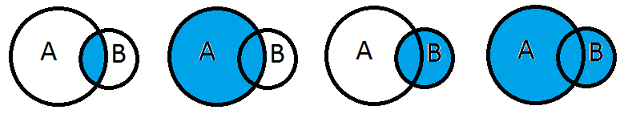

In [ ]:
from IPython.display import Image
Image("patates.png")

On souhaite ajouter une colonne pays aux marathons se déroulant dans les villes suivanes.

In [ ]:
values = [  {"V":'BOSTON', "C":"USA"}, 
            {"V":'NEW YORK', "C":"USA"}, 
            {"V":'BERLIN', "C":"Germany"}, 
            {"V":'LONDON', "C":"UK"}, 
            {"V":'PARIS', "C":"France"}]
pays = pandas.DataFrame(values)
pays

,C,V
0,USA,BOSTON
1,USA,NEW YORK
2,Germany,BERLIN
3,UK,LONDON
4,France,PARIS


In [ ]:
dfavecpays = df.merge(pays, left_on="ville", right_on="V")
pandas.concat([dfavecpays.head(n=2),dfavecpays.tail(n=2)])

,ville,annee,temps,secondes,C,V
0,PARIS,2011,02:06:29,7589,France,PARIS
1,PARIS,2010,02:06:41,7601,France,PARIS
193,BOSTON,2010,02:05:52,7552,USA,BOSTON
194,BOSTON,2011,02:03:02,7382,USA,BOSTON


### pivot (tableau croisé dynamique)

Cette opération consiste à créer une seconde table en utilisant utiliser les valeurs d'une colonne comme nom de colonnes. 

| A | B | C |
| --- | --- | --- |
| A1 | B1 | C1 |
| A1 | B2 | C2 |
| A2 | B1 | C3 |
| A2 | B2 | C4 |
| A2 | B3 | C5 |

L'opération ``pivot(A,B,C)`` donnera :

| A | B1 | B2 | B3 |
| --- | --- | --- | --- |
| A1 | C1 | C2 |  |
| A2 | C3 | C4 | C5 |

* [pivot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html)
* [Reshaping and Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)
* [Tableau croisé dynamique - wikipédia](http://fr.wikipedia.org/wiki/Tableau_crois%C3%A9_dynamique)

On applique cela aux marathons où on veut avoir les villes comme noms de colonnes et une année par lignes.

In [ ]:
piv = df.pivot("annee","ville","temps")
pandas.concat([piv[20:23],piv[40:43],piv.tail(n=3)])

ville,AMSTERDAM,BERLIN,BOSTON,CHICAGO,FUKUOKA,LONDON,NEW YORK,PARIS,STOCKOLM
annee,,,,,,,,,
1967,NaN,NaN,02:15:45,NaN,02:09:37,NaN,NaN,NaN,NaN
1968,NaN,NaN,02:22:17,NaN,02:10:48,NaN,NaN,NaN,NaN
1969,NaN,NaN,02:13:49,NaN,02:11:13,NaN,NaN,NaN,NaN
1987,02:12:40,02:11:11,02:11:50,NaN,02:08:18,02:09:50,02:11:01,02:11:09,02:13:52
1988,02:12:38,02:11:45,02:08:43,02:08:57,02:11:04,02:10:20,02:08:20,02:13:53,02:14:26
1989,02:13:52,02:10:11,02:09:06,02:11:25,02:12:54,02:09:03,02:08:01,02:13:03,02:13:34
2009,02:06:18,02:06:08,02:08:42,02:05:41,02:05:18,02:05:10,02:09:15,02:05:47,02:15:34
2010,02:05:44,02:05:08,02:05:52,02:06:23,02:08:24,02:05:19,02:08:14,02:06:41,02:12:48
2011,NaN,02:03:38,02:03:02,NaN,NaN,02:04:40,NaN,02:06:29,02:14:07


Il existe une méthode qui effectue l'opération inverse : [Dataframe.stack](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.stack.html).

## Exercice 2 : moyennes par groupes
    
Toujours avec le même jeu de données ([marathon.txt](http://www.xavierdupre.fr/enseignement/complements/marathon.txt)), on veut ajouter une ligne à la fin du tableau croisé dynamique contenant la moyenne en secondes des temps des marathons pour chaque ville.

## Dates

Les dates sont souvent compliquées à gérer car on n'utilise pas le mêmes format dans tous les pays. Pour faire simple, je recommande deux options :

* Soit convertir les dates/heures au format chaînes de caractères ``AAAA-MM-JJ hh:mm:ss:ms`` qui permet de trier les dates par ordre croissant.
* Soit convertir les dates/heures au format [datetime](https://docs.python.org/3/library/datetime.html) (date) ou [timedelta](https://docs.python.org/3/library/datetime.html#timedelta-objects) (durée) (voir [Quelques notions sur les dates](http://www.xavierdupre.fr/blog/notebooks/example%20pyensae.html#date), [format de date/heure](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior)).

Par exemple, voici le code qui a permis de générer la colonne seconde de la table marathon :

In [ ]:
from datetime import datetime, time
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
df = df [["ville", "annee", "temps"]]  # on enlève la colonne secondes pour la recréer
df["secondes"] = df.apply( lambda r : (datetime.strptime(r.temps,"%H:%M:%S") - \
                                         datetime(1900,1,1)).total_seconds(), axis=1)
df.head()

,ville,annee,temps,secondes
0,PARIS,2011,02:06:29,7589.0
1,PARIS,2010,02:06:41,7601.0
2,PARIS,2009,02:05:47,7547.0
3,PARIS,2008,02:06:40,7600.0
4,PARIS,2007,02:07:17,7637.0


## Matrix, Array (numpy)

Le module le plus populaire sous Python est [numpy](http://www.numpy.org/). Il propose deux containers [Matrix](http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) et [Array](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) qui facilitent le calcul matriciel. Ce module est écrit en C++, Fortran. Il sera plus rapide que tout code écrit en Python. De nombreuses modules Python s'appuient sur numpy : [SciPy](http://www.scipy.org/), [pandas](http://pandas.pydata.org/), [scikit-learn](http://scikit-learn.org/stable/), [matplotlib](http://matplotlib.org/), ... Il y a deux différences entre un ``DataFrame`` et un tableau ``numpy`` :

* Il n'y a pas d'index sur les lignes autre que l'index entier de la ligne.
* Tous les types doivent être identiques (tous entier, tous réels, tous str). Il n'y a pas de mélange possible. C'est à cette condition que les calculs sont aussi rapides.



In [ ]:
import numpy
print("int","\n",numpy.matrix([[1, 2], [3, 4,]]))
print("float","\n",numpy.matrix([[1, 2], [3, 4.1]]))
print("str","\n",numpy.matrix([[1, 2], [3, '4']]))

int 
 [[1 2]
 [3 4]]
float 
 [[ 1.   2. ]
 [ 3.   4.1]]
str 
 [['1' '2']
 ['3' '4']]


Il y a deux types d'objets, ``array`` et ``matrix``. Le type ``matrix`` se comporte comme on peut l'attendre d'une matrice. Le type ``array`` est plus générique et autorise plus de deux dimensions. Les opérateurs qui s'y appliquent ne comportent pas comme ceux d'une matrice, en particulier la multiplication qui se fait terme à terme pour un tableau.

In [ ]:
m1 = numpy.matrix( [[0.0,1.0],[1.0,0.0]])
print("multiplication de matrices\n",m1 * m1)
m2 = numpy.array([[0.0,1.0],[1.0,0.0]])
print("multiplication de tableaux (terme à terme)\n",m2 * m2)

multiplication de matrices
 [[ 1.  0.]
 [ 0.  1.]]
multiplication de tableaux (terme à terme)
 [[ 0.  1.]
 [ 1.  0.]]


Un tableau en plusieurs dimensions :

In [ ]:
cube = numpy.array( [  [[0.0,1.0],[1.0,0.0]],
                       [[0.0,1.0],[1.0,0.0]] ] )
print(cube.shape)
cube

(2, 2, 2)


array([[[ 0.,  1.],
        [ 1.,  0.]],

       [[ 0.,  1.],
        [ 1.,  0.]]])

Quelques liens pour apprendre à manipuler ces objets :
    
- [opérations avec numpy.matrix](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/all_example_science.html#operations-avec-numpy-matrix)    
- [Numpy - multidimensional data arrays](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)
- [NUmpy Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)
- [classe numpy.matrix](http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html)
- [classe numpy.array](http://docs.scipy.org/doc/numpy/reference/arrays.html)

### matrices nulle, identité, aléatoire

On utilise beaucoup les fonctions suivantes pour créer une matrice ou un tableau particulier.

In [ ]:
# la matrice nulle
numpy.zeros( (3,4) )

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [ ]:
# la matrice de 1
numpy.ones( (3,4) )

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [ ]:
# la matrice identité
numpy.identity( 3 )

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
# la matrice aléatoire
numpy.random.random( (3,4))

array([[ 0.56295296,  0.77545561,  0.56041393,  0.90371888],
       [ 0.09984123,  0.59781939,  0.09845057,  0.30856921],
       [ 0.37161512,  0.5630934 ,  0.6359542 ,  0.13298039]])

Pour d'autres fonctionnalités aléatoires : [numpy.random](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

### Quelques fonctions fréquemment utilisées

* [column_stack](http://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) : pour assembler des colonnes les unes à côté des autres
* [vstack](http://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) : pour assembler des lignes les unes à la suite des autres

### de DataFrame à numpy

Le plus simple est sans doute d'utiliser ``pandas`` pour lire un fichier texte et d'utiliser la fonction [as_matrix](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html) pour convertir tout ou partie du ``DataFrame`` en ``numpy.matrix``.

In [ ]:
from pandas import read_csv
import numpy
from datetime import datetime, time
from ensae_teaching_cs.data import marathon
df = read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
arr = df[["annee","secondes"]].as_matrix() # retourne un array (et non un matrix)
mat = numpy.matrix(arr)
print(type(arr),type(mat))
arr[:2,:]

<class 'numpy.ndarray'> <class 'numpy.matrixlib.defmatrix.matrix'>


array([[2011, 7589],
       [2010, 7601]], dtype=int64)

La conversion réciproque est aussi simple mais il faut préciser les noms des colonnes qui ne sont pas mémorisées dans l'objet ``numpy.array`` :

In [ ]:
import pandas
df2 = pandas.DataFrame(arr, columns=["annee", "secondes"])
df2.head(n=2)

,annee,secondes
0,2011,7589
1,2010,7601


## Exercice 3 : régression linéaire

On souhaite implémenter une [régression](http://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire_multiple) qui se traduit par le problème suivant : $Y=XA+\epsilon$. La solution est donnée par la formule matricielle : $A^*=(X'X)^{-1}X'Y$. On prépare les données suivantes.

In [ ]:
from pandas import read_csv
from datetime import datetime, time
from ensae_teaching_cs.data import marathon
df = read_csv(marathon(filename=True), 
              sep="\t", names=["ville", "annee", "temps","secondes"])
df = df [ (df["ville"] == "BERLIN") | (df["ville"] == "PARIS") ] 
for v in ["PARIS","BERLIN"]:
    df["est" + v] = df.apply( lambda r : 1 if r["ville"] == v else 0, axis=1)
df.head(n = 3)

,ville,annee,temps,secondes,estPARIS,estBERLIN
0,PARIS,2011,02:06:29,7589,1,0
1,PARIS,2010,02:06:41,7601,1,0
2,PARIS,2009,02:05:47,7547,1,0


On veut construire le modèle : $secondes = a_0 \; annee + a_1 \; stPARIS + a_2 \; estBERLIN$. En appliquant la formule ci-dessus, déterminer les coefficients $a_0,a_1,a_2$.

## Annexes

### Créer un fichier Excel avec plusieurs feuilles

La page [Allow ExcelWriter() to add sheets to existing workbook](https://github.com/pydata/pandas/issues/3441) donne plusieurs exemples d'écriture.

In [ ]:
import pandas
writer = pandas.ExcelWriter('tou_example.xlsx')
df.to_excel(writer, 'Data 0')
df.to_excel(writer, 'Data 1')
writer.save()